In [37]:
# First let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



In [38]:
# Now we need to read in the data
df = pd.read_csv(r'C:\Users\eshaayn\Downloads\movies.csv')

In [39]:
#displaying the null values
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [40]:
#Drop the rows with less null values 
columns_with_na = ['released', 'score', 'votes',
                   'writer', 'star', 'country',
                   'runtime']
df = df.dropna(axis=0, subset = columns_with_na)
df.isna().sum()

name           0
rating        72
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      2166
gross        182
company       13
runtime        0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7656 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7656 non-null   object 
 1   rating    7584 non-null   object 
 2   genre     7656 non-null   object 
 3   year      7656 non-null   int64  
 4   released  7656 non-null   object 
 5   score     7656 non-null   float64
 6   votes     7656 non-null   float64
 7   director  7656 non-null   object 
 8   writer    7656 non-null   object 
 9   star      7656 non-null   object 
 10  country   7656 non-null   object 
 11  budget    5490 non-null   float64
 12  gross     7474 non-null   float64
 13  company   7643 non-null   object 
 14  runtime   7656 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 957.0+ KB


In [42]:
# Four columns left with null values 'rating: object'. 'budget: float', 'gross: float','company: object'

#rating is categorical data 'R' or 'PG', we will impute it with most frequent value

imputer = SimpleImputer(strategy="most_frequent")
df['rating'] = imputer.fit_transform(df[['rating']])


#budget & gross are float so we will impute it with mean value
mean_value_budget = df['budget'].mean()
mean_value_gross = df['gross'].mean()
df['budget'].fillna(value=mean_value_budget, inplace=True)
df['gross'].fillna(value=mean_value_gross, inplace=True)

# company names are unique and null values are just 13 so we can remove the rows with company name as null,will not effect the dataset
df = df.dropna(axis=0, subset = ['company'])

df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [44]:
#datatypes for our columns
df.dtypes
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [46]:
#change datatype of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [47]:
# correcting the year
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [49]:
#sort by gross
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [13]:
#to display all rows
pd.set_option('display.max_rows',None)

In [50]:
# drop any duplicates
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


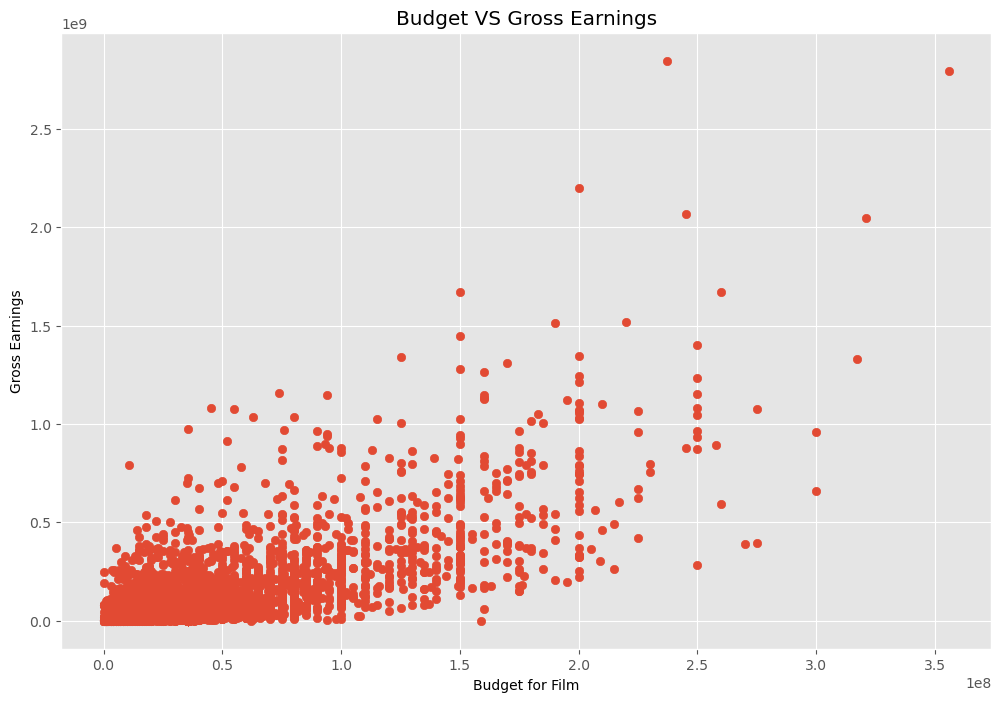

In [54]:
#scatter plot with budget vs gross

plt.scatter(x=df['budget'], y = df['gross'])
plt.title('Budget VS Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

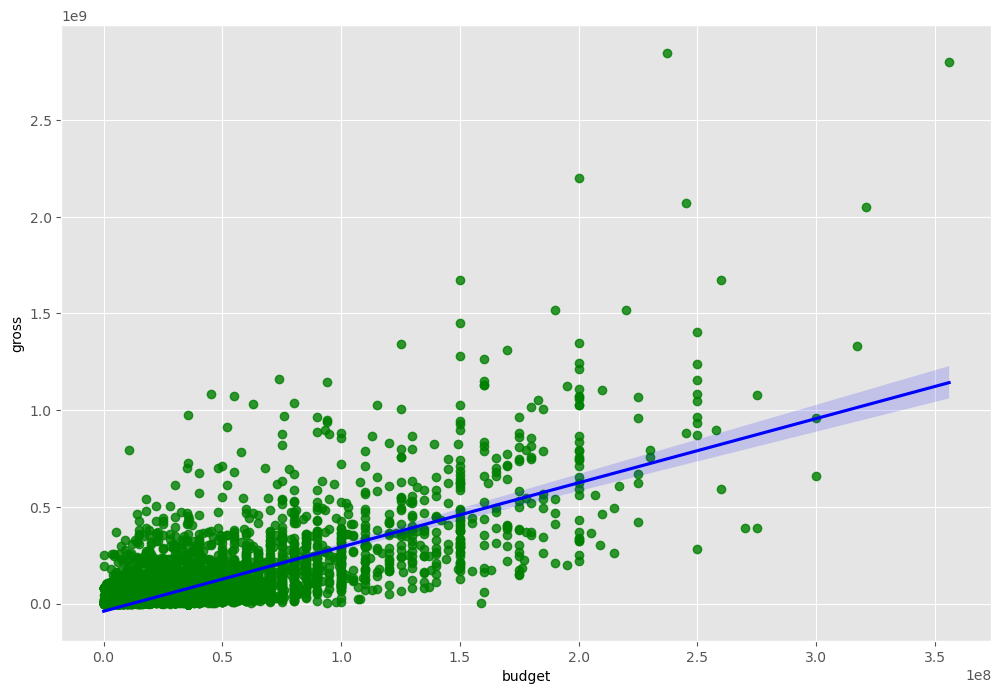

In [58]:
# plot budget vs gross using seaborn
sns.regplot(x = 'budget', y = 'gross', data= df , scatter_kws = {'color': 'green'}, line_kws = {'color': 'blue'})

In [62]:
# lets start loking at correlation
df.corr(numeric_only=True, method = 'pearson')  # three method person, kendall,spearman


,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.098278,0.223353,0.267186,0.252436,0.119789,0.997401
score,0.098278,1.000000,0.409432,0.064173,0.182866,0.399965,0.106108
votes,0.223353,0.409432,1.000000,0.420829,0.628743,0.308907,0.218802
budget,0.267186,0.064173,0.420829,1.000000,0.711616,0.265089,0.261098
gross,0.252436,0.182866,0.628743,0.711616,1.000000,0.241296,0.245793
runtime,0.119789,0.399965,0.308907,0.265089,0.241296,1.000000,0.119595
yearcorrect,0.997401,0.106108,0.218802,0.261098,0.245793,0.119595,1.000000


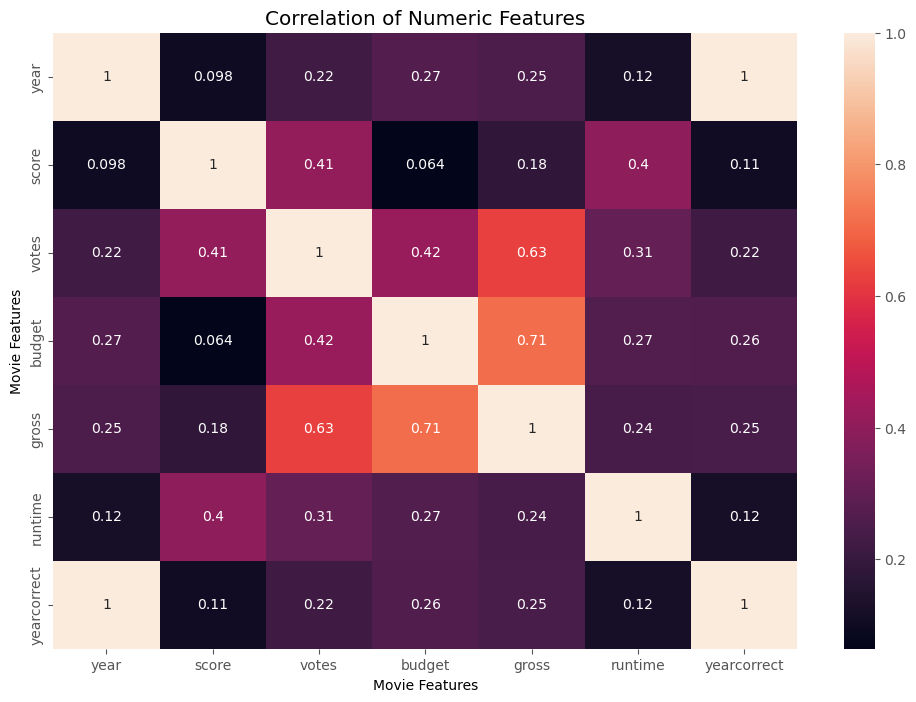

In [64]:
correlation_matrix = df.corr(numeric_only=True, method = 'pearson') 
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation of Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()